In [4]:
%load_ext autoreload
%autoreload 2

In [1]:
from data import get_data
from model import Model_2
from utils import train, test
import torch
import torch.optim as optim


In [2]:
train_data = get_data(train=True)
test_data = get_data(train=False)

In [3]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train_data, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_args)

CUDA Available? True


In [5]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

model = Model_2().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             900
       BatchNorm2d-6           [-1, 10, 24, 24]              20
              ReLU-7           [-1, 10, 24, 24]               0
           Dropout-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 20, 22, 22]           1,800
      BatchNorm2d-10           [-1, 20, 22, 22]              40
             ReLU-11           [-1, 20, 22, 22]               0
          Dropout-12           [-1, 20, 22, 22]               0
        MaxPool2d-13           [-1, 20, 11, 11]               0
           Conv2d-14           [-1

In [6]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

model = Model_2().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch, train_losses, train_acc)
    test(model, device, test_loader, test_losses, test_acc)

EPOCH: 0


Loss=0.36189529299736023 Batch_id=468 Accuracy=62.61: 100%|██████████| 469/469 [00:06<00:00, 68.57it/s]



Test set: Average loss: 0.6158, Accuracy: 8134/10000 (81.34%)

EPOCH: 1


Loss=0.2341376543045044 Batch_id=468 Accuracy=94.43: 100%|██████████| 469/469 [00:06<00:00, 68.31it/s] 



Test set: Average loss: 0.1924, Accuracy: 9462/10000 (94.62%)

EPOCH: 2


Loss=0.16530588269233704 Batch_id=468 Accuracy=96.02: 100%|██████████| 469/469 [00:06<00:00, 70.00it/s] 



Test set: Average loss: 0.1536, Accuracy: 9556/10000 (95.56%)

EPOCH: 3


Loss=0.09284918755292892 Batch_id=468 Accuracy=96.83: 100%|██████████| 469/469 [00:06<00:00, 69.64it/s] 



Test set: Average loss: 0.1604, Accuracy: 9526/10000 (95.26%)

EPOCH: 4


Loss=0.1187230721116066 Batch_id=468 Accuracy=97.20: 100%|██████████| 469/469 [00:07<00:00, 61.75it/s]  



Test set: Average loss: 0.0828, Accuracy: 9754/10000 (97.54%)

EPOCH: 5


Loss=0.10187835246324539 Batch_id=468 Accuracy=97.50: 100%|██████████| 469/469 [00:06<00:00, 68.07it/s] 



Test set: Average loss: 0.0766, Accuracy: 9777/10000 (97.77%)

EPOCH: 6


Loss=0.043204184621572495 Batch_id=468 Accuracy=97.70: 100%|██████████| 469/469 [00:07<00:00, 65.45it/s]



Test set: Average loss: 0.0699, Accuracy: 9784/10000 (97.84%)

EPOCH: 7


Loss=0.13381026685237885 Batch_id=468 Accuracy=97.78: 100%|██████████| 469/469 [00:06<00:00, 67.75it/s] 



Test set: Average loss: 0.0676, Accuracy: 9798/10000 (97.98%)

EPOCH: 8


Loss=0.05097639560699463 Batch_id=468 Accuracy=97.99: 100%|██████████| 469/469 [00:06<00:00, 68.81it/s] 



Test set: Average loss: 0.0641, Accuracy: 9799/10000 (97.99%)

EPOCH: 9


Loss=0.07952028512954712 Batch_id=468 Accuracy=98.08: 100%|██████████| 469/469 [00:06<00:00, 69.35it/s] 



Test set: Average loss: 0.0519, Accuracy: 9843/10000 (98.43%)

EPOCH: 10


Loss=0.03532574698328972 Batch_id=468 Accuracy=98.13: 100%|██████████| 469/469 [00:06<00:00, 69.80it/s] 



Test set: Average loss: 0.0595, Accuracy: 9818/10000 (98.18%)

EPOCH: 11


Loss=0.017943955957889557 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:06<00:00, 68.03it/s]



Test set: Average loss: 0.0625, Accuracy: 9803/10000 (98.03%)

EPOCH: 12


Loss=0.04985983297228813 Batch_id=468 Accuracy=98.30: 100%|██████████| 469/469 [00:07<00:00, 60.39it/s] 



Test set: Average loss: 0.0571, Accuracy: 9821/10000 (98.21%)

EPOCH: 13


Loss=0.10642001777887344 Batch_id=468 Accuracy=98.29: 100%|██████████| 469/469 [00:06<00:00, 69.78it/s] 



Test set: Average loss: 0.0457, Accuracy: 9861/10000 (98.61%)

EPOCH: 14


Loss=0.034449927508831024 Batch_id=468 Accuracy=98.31: 100%|██████████| 469/469 [00:06<00:00, 67.44it/s]



Test set: Average loss: 0.0502, Accuracy: 9853/10000 (98.53%)



In [7]:
t = [t_items.item() for t_items in train_losses]

Text(0.5, 1.0, 'Test Accuracy')

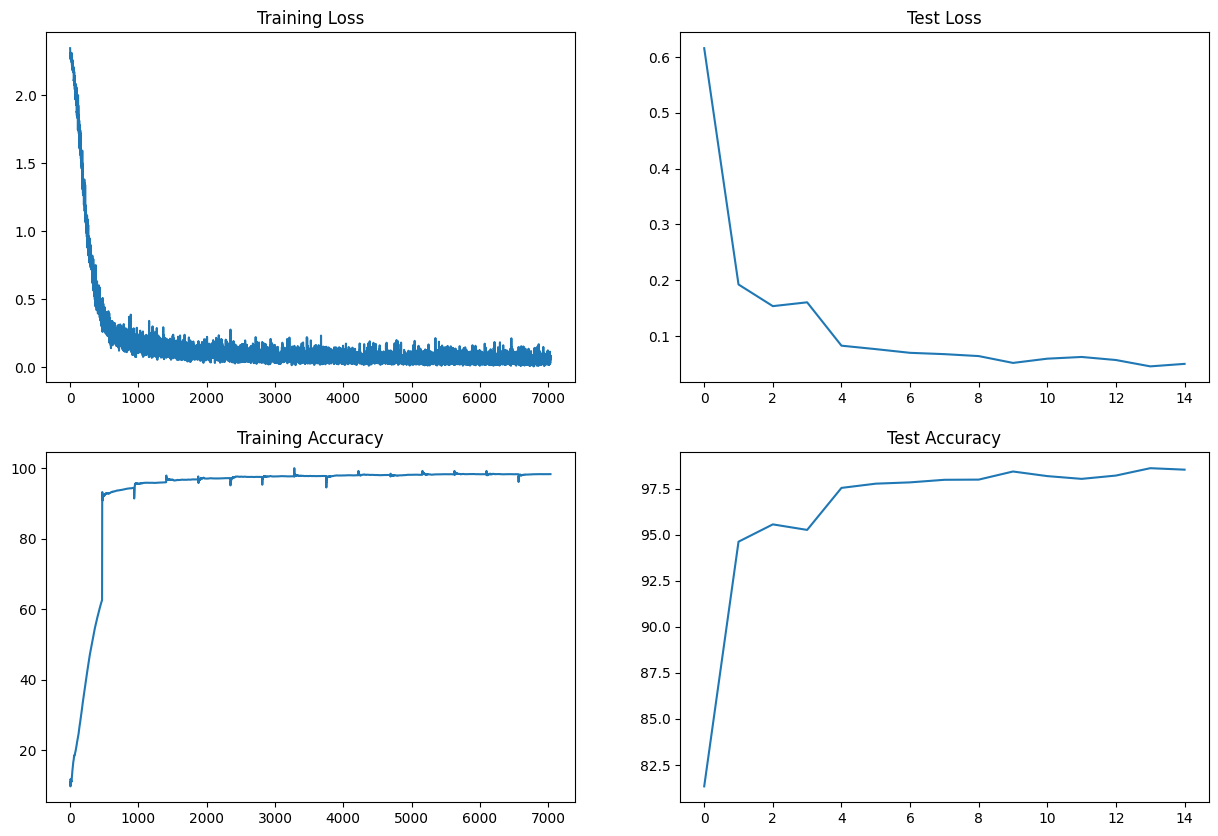

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")